In [69]:
import os
import pandas as pd
from enum import Enum
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

INSTANCES = 10
MIN_SIZE = 8
SIZES = 5

class Symmetry(Enum):
    SYMMETRIC = "Symetryczne"
    ASYMMETRIC = "Asymetryczne"

class Density(Enum):
    PERCENT_30 = "30%"
    PERCENT_60 = "60%"
    PERCENT_100 = "100%"

In [70]:
#Find all files in dir_path directory
dir_path = "../build/Proj_1/Wyniki"
file_list = os.listdir(dir_path)
print(file_list)

['bfsresoult.csv']


In [71]:
#Read data from all .csv
data_frames = {}
for file_name in file_list:
    file_path = "../build/Proj_1/Wyniki/"+file_name
    data_frame = pd.read_csv(file_path)
    data_frames[file_name] = data_frame

In [72]:
#Genrate base table and column list
columns = pd.MultiIndex.from_tuples(
    [
        ("","Rozmiar/Gęstość"),
        (Symmetry.SYMMETRIC.value, Density.PERCENT_30.value),
        (Symmetry.SYMMETRIC.value, Density.PERCENT_60.value),
        (Symmetry.SYMMETRIC.value, Density.PERCENT_100.value),
        (Symmetry.ASYMMETRIC.value, Density.PERCENT_30.value),
        (Symmetry.ASYMMETRIC.value, Density.PERCENT_60.value),
        (Symmetry.ASYMMETRIC.value, Density.PERCENT_100.value)
    ],
    )
base_table = pd.DataFrame(columns=columns)
index_table = [0]*SIZES
for i in range(SIZES):
    empty_row = [None] * len(base_table.columns)
    base_table.loc[len(base_table)] = empty_row 
    base_table.at[len(base_table) - 1, ("", "Rozmiar/Gęstość")] = i + MIN_SIZE
    index_table[i] = i + MIN_SIZE

i = 0
j = 0
column_list = [
    (Symmetry.SYMMETRIC.value, Density.PERCENT_30.value),
    (Symmetry.SYMMETRIC.value, Density.PERCENT_60.value),
    (Symmetry.SYMMETRIC.value, Density.PERCENT_100.value),
    (Symmetry.ASYMMETRIC.value, Density.PERCENT_30.value),
    (Symmetry.ASYMMETRIC.value, Density.PERCENT_60.value),
    (Symmetry.ASYMMETRIC.value, Density.PERCENT_100.value)
]

In [79]:
def save_to_latex(saved_table,file_name,caption,label):
    f = open("./src/tables/"+file_name, "a",encoding="utf-8")
    latex_output = saved_table.to_latex(  index=False,
                                    column_format="rrrrrrr",
                                    caption=caption,
                                    label="tab:"+label,
                                    multicolumn_format="c")
    latex_output = latex_output.replace(r"\begin{table}", r"\begin{table}[h!]")
    latex_output = latex_output.replace("Rozmiar Instancji/\n","Rozmiar Instancji/\\linebreak")
    latex_output = latex_output.replace("\\caption{"+caption+"}\n","")
    latex_output = latex_output.replace("\\label{tab:"+label+"}\n","")
    latex_output = latex_output.replace("\\end{tabular}","\\end{tabular} \n\\caption{"+caption+"}\n"+"\\label{tab:"+label+"}")
    latex_output = latex_output.replace("%", r"\%")
    f.write(latex_output)
    f.close()

In [ ]:
#Create Mean execute time tables
time_frames = {}
for file_name in file_list:
    data_frame = data_frames[file_name]
    start = 1
    end = 1
    table = base_table
    j = 0
    for start in range(1, (len(data_frame) +1)- INSTANCES, INSTANCES+1):
        end = start+INSTANCES
        selected_data = data_frame.iloc[start:end]
        average_value = selected_data["Czas wykonania"].mean()
        table.at[i, column_list[j]] = average_value/1000000000
        i += 1
        if i >= SIZES:
            i = 0
            j += 1
    time_frames[file_name] = table
    pd.options.display.float_format = '{:.6f}'.format
    save_to_latex(table,"MeanTime.tex","Czasy wykonania algorytmu dla macierzy symetrycznych i niesymetrycznych","mean_time_"+file_name)
    print(table.to_string(index=False))

                Symetryczne                     Asymetryczne                     
Rozmiar/Gęstość         30%      60%       100%          30%       60%       100%
              8    0.000309 0.000893   0.021742     0.000316  0.011754   0.027044
              9    0.001921 0.005820   0.183279     0.002084  0.065804   0.216008
             10    0.006027 0.036310   1.813179     0.006508  0.469833   1.932505
             11    0.000742 0.227200  19.783483     0.042772  7.037906  20.387592
             12    0.003750 1.682285 239.443230     0.295299 25.024631 239.564080


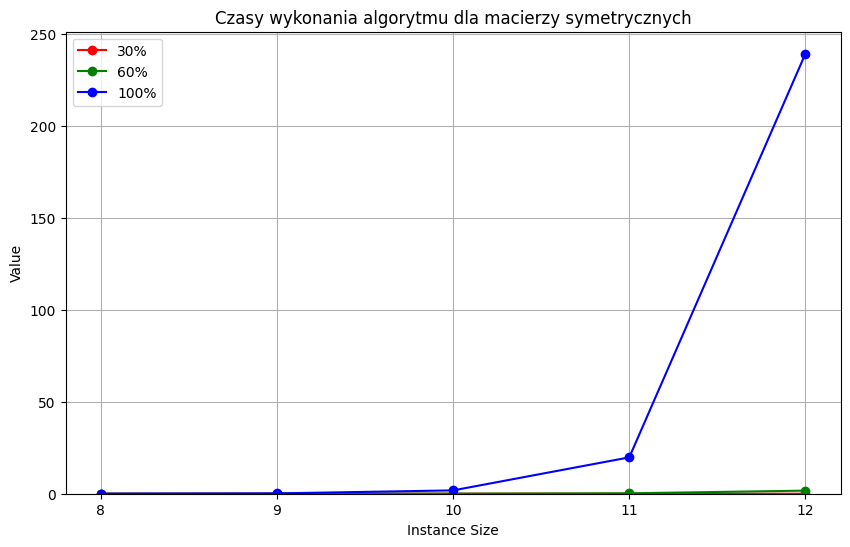

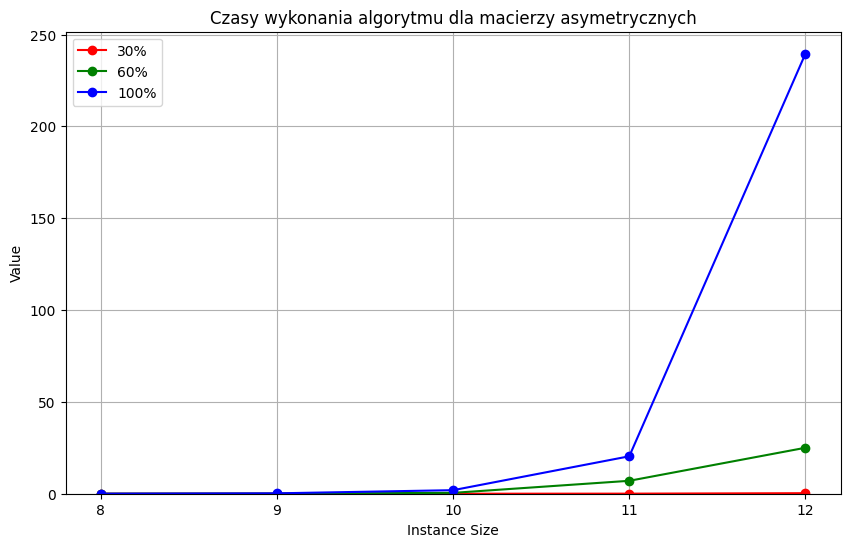

In [75]:
#Create Mean execute time plots
for file_name in file_list:
    data_frame = time_frames[file_name]
    plt.figure(figsize=(10, 6))
    plt.plot(index_table,table[column_list[0]], label="30%", marker='o',color='red')
    plt.plot(index_table,table[column_list[1]], label="60%", marker='o',color='green')
    plt.plot(index_table,table[column_list[2]], label="100%", marker='o',color='blue')
    plt.ylabel("Value")
    plt.ylim(bottom=0)
    plt.xlabel("Instance Size")
    plt.xticks(index_table)
    plt.title("Czasy wykonania algorytmu dla macierzy symetrycznych")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(index_table,table[column_list[3]], label="30%", marker='o',color='red')
    plt.plot(index_table,table[column_list[4]], label="60%", marker='o',color='green')
    plt.plot(index_table,table[column_list[5]], label="100%", marker='o',color='blue')
    plt.ylabel("Value")
    plt.ylim(bottom=0)
    plt.xlabel("Instance Size")
    plt.xticks(index_table)
    plt.title("Czasy wykonania algorytmu dla macierzy asymetrycznych")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
#Create Resoult tables
for file_name in file_list:
    data_frame = data_frames[file_name]
    start = 1
    end = 1
    table = base_table
    j = 0
    for start in range(1, (len(data_frame) +1)- INSTANCES, INSTANCES+1):
        end = start+INSTANCES
        selected_data = data_frame.iloc[start:end]
        average_value = selected_data["Otrzymany wynik"].min()
        table.at[i, column_list[j]] = int(average_value)
        i += 1
        if i >= SIZES:
            i = 0
            j += 1
    save_to_latex(table,"Resoult.tex","Błędy w wynikach algorytmu dla macierzy symetrycznych i niesymetrycznych","resoult_"+file_name)
    print(table.to_string(index=False))

                Symetryczne             Asymetryczne            
Rozmiar/Gęstość         30%   60%  100%          30%   60%  100%
              8       30867 22264 12806        28719 16340 18843
              9       23923 28513  7129        26942 13728 17589
             10       24562 39212 16436        26726 14207 14841
             11       40077 32101 15619        39594 19117 13061
             12       39712 26906 17016        32837 13727 12343


In [ ]:
#Create Mean error tables
for file_name in file_list:
    data_frame = data_frames[file_name]
    start = 1
    end = 1
    table = base_table
    j = 0
    for start in range(1, (len(data_frame) +1)- INSTANCES, INSTANCES+1):
        end = start+INSTANCES
        selected_data = data_frame.iloc[start:end]
        average_value = selected_data["Blad wzgledny (liczbowo)"].mean()
        table.at[i, column_list[j]] = round(average_value, 2)
        i += 1
        if i >= SIZES:
            i = 0
            j += 1
    pd.options.display.float_format = '{:.2f}'.format
    save_to_latex(table,"Error.tex","Błędy w wynikach algorytmu dla macierzy symetrycznych i niesymetrycznych","error_"+file_name)
    print(table.to_string(index=False))

                Symetryczne           Asymetryczne          
Rozmiar/Gęstość         30%  60% 100%          30%  60% 100%
              8        0.00 0.00 0.00         0.00 0.00 0.09
              9        0.00 0.00 0.00         0.00 0.10 0.00
             10        0.00 0.00 0.00         0.09 0.15 0.00
             11        0.00 0.00 0.00         0.00 0.06 0.04
             12        0.00 0.00 0.00         0.00 0.13 0.00


In [78]:
#Print whole csv
for name, df in data_frames.items():
    print(f"Data from {name}:")
    print(df.to_string())

Data from bfsresoult.csv:
                  Optymalny wynik Optymalna scieżka Otrzymany wynik             Otrzymana scieżka  Czas wykonania  Blad bezwzgledny  Blad wzgledny (liczbowo) Blad wzgledny (procentowo)
0        \Dane\SYM30\GRAF8_30.txt               bfs           false                           NaN             NaN               NaN                       NaN                        NaN
1                           30867               NaN           30867             1-5-4-7-3-2-8-6-1       306500.00              0.00                      0.00                  0.000000%
2                           30867               NaN           30867             1-5-4-7-3-2-8-6-1       312700.00              0.00                      0.00                  0.000000%
3                           30867               NaN           30867             1-5-4-7-3-2-8-6-1       305800.00              0.00                      0.00                  0.000000%
4                           30867               N